# Part I - (Ford Go Bike)
## by (Oyekanmi Susan Omobukola))

## Introduction

This data set information contains information about bike rides covering a particular area known as San Francisco Bay



## Preliminary Wrangling

The steps involved include data gathering,data aassessing,data cleaning 

DATA GATHERING 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

> Load in your dataset 


In [2]:
ford_df=pd.read_csv('fordgo.csv')
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


ASSESSING DATA (VISUALLY&PROGRAMMATICALLY )

In [3]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


From this information ,it shows there are missing numbers in some of the columns like start_station_id,start_station_name,

end_station_name,end_station_id ,member_birth_year,member_gender

In [4]:
# to check for the total no of missing numbers present 
ford_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

It's obvious that there are missing numbers in 6 columns which will be cleaned during the cleaning section

In [5]:
# to checkif there are any duplicted entries in the dataset 
ford_df.duplicated().sum() 

0

From this infor,mation ,there isn't any duplicate entry in the dataset

In [6]:
# to check for the shape of the dataset 
ford_df.shape 

(183412, 16)

There are 183412 rows with 16 columns

ISSUES IN THE DATASET

QUALITY ISSUES

1.Missing numbers in 6 columns asseen in the assessing section

2.Wrong datatypes with columns like start_time,end-time,member_id

3.Removing unnecessary columns in the datraset

TIDINESS ISSUES

1.Crelate new columns

DATA CLEANING

define

To copy the original dataset

code

In [7]:
new_ford=ford_df.copy() 

test

In [8]:
# to check if the dataset has been copied
new_ford.sample(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
161711,252,2019-02-05 14:03:05.1050,2019-02-05 14:07:17.6310,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,243.0,Bancroft Way at College Ave,37.869360,-122.254337,4779,Subscriber,1996.0,Male,No
47938,778,2019-02-22 08:17:24.5140,2019-02-22 08:30:22.7250,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,124.0,19th St at Florida St,37.760447,-122.410807,6236,Subscriber,1959.0,Male,No
77274,513,2019-02-19 07:24:38.5420,2019-02-19 07:33:11.6550,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,6253,Subscriber,1973.0,Male,No
118495,352,2019-02-11 18:52:13.4840,2019-02-11 18:58:05.7160,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5408,Subscriber,1986.0,Female,No


This shows that the dataset has been copied

define

to correct all missing numbers in the dataset

code

In [9]:
new_ford.dropna(inplace=True) 

test

verify if the missing numbers has been dropped

In [10]:
new_ford.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

This shows that the missing numbers has been removed

ISSUES 2 AND TIDINESS 1

QUALITY ISSUE 2

define

to correct wrong datatypes and adding new columns

code

In [11]:
# correct the start_time datatypes
new_ford['start_time'] = pd.to_datetime(new_ford['start_time'])

In [12]:
# correct the end_time datatype
new_ford['end_time'] = pd.to_datetime(new_ford['end_time'])

TIDINESS ISSUE 1

In [13]:
# creating a start_date column 
new_ford['start_date'] =pd.to_datetime(new_ford.start_time.dt.strftime('%Y-%m-%d')) 

In [14]:
# creating a start_HOUROFDAY column
new_ford['start_hourofday'] = (new_ford.start_time.dt.strftime('%H')).astype(int) 

In [15]:
# creating start_dayofweek column
new_ford['start_dayofweek'] = new_ford.start_time.dt.strftime('%A')

In [16]:
# creating a start_month column
new_ford['start_month'] = new_ford.start_time.dt.strftime('%B')

In [17]:
# creating a end_date column
new_ford['end_date'] = pd.to_datetime(new_ford.end_time.dt.strftime('%Y-%m-%d'))

In [18]:
# creating a end_hourofday column
new_ford['end_hourofday'] = (new_ford.end_time.dt.strftime('%H')).astype(int) 

In [19]:
# creating a end_dayofweek column
new_ford['end_dayofweek'] = new_ford.end_time.dt.strftime('%A')

In [20]:
# creating a end_month column
new_ford['end_month'] = new_ford.end_time.dt.strftime('%B')

In [21]:
#creating a new column by dividing the duration_sec by 60 
new_ford['duration_minute'] = (new_ford['duration_sec']/60).astype(int)

In [22]:
# creating a new column  by subtracting the age fromthe current year 
new_ford['member_age'] = 2022 - new_ford['member_birth_year']

QUALITY ISSUES 2 CONTINUED 

In [23]:
# converting the datatypes of bike_id 
new_ford['bike_id'] = new_ford['bike_id'].astype('str')

In [25]:
# converting the datatypes of member_age 
new_ford['member_age'] = new_ford['member_age'].astype(int)

test

verify if the columns datatypes has been changed



In [29]:
new_ford .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null datetime64[ns]
start_hourofday            174952 non-null int64
start_dayofweek            174952 non-null object
start_month                174952 non-null object
end_date                   174952 non-null datetime64[ns]
end_hourofday              174952 non-null int64
end_dayofweek              174952 non-null object
end_month                  174952 non-null object
duration_minute            174952 non-null int64
member_age                 174952 non-null int64
dtypes: datetime64[ns](2), int64(4), object(10)
memory usage: 22.7+ MB


this shows the datatypes has been changed correctly and new columns has been created properly

ISSUE 3

define

removing unecessary columns

code

In [ ]:
new_ford.drop(['duration_sec','start_time','end_time','start_station_id','start_station_latitude','start_station_longitude',
         'end_station_id','end_station_latitude', 'end_station_longitude','member_birth_year'],axis =1 , inplace = True)

test

verify if the columns has been dropped properly

In [31]:
new_ford.head(8)

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_date,start_hourofday,start_dayofweek,start_month,end_date,end_hourofday,end_dayofweek,end_month,duration_minute,member_age
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,2019-02-28,17,Thursday,February,2019-03-01,8,Friday,March,869,38
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2019-02-28,12,Thursday,February,2019-03-01,5,Friday,March,1030,50
3,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,2019-02-28,17,Thursday,February,2019-03-01,4,Friday,March,608,33
4,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,Yes,2019-02-28,23,Thursday,February,2019-03-01,0,Friday,March,26,48
5,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,No,2019-02-28,23,Thursday,February,2019-03-01,0,Friday,March,29,63
6,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,Female,No,2019-02-28,23,Thursday,February,2019-03-01,0,Friday,March,19,39
7,Washington St at Kearny St,Valencia St at 21st St,6329,Subscriber,Male,No,2019-02-28,23,Thursday,February,2019-03-01,0,Friday,March,26,33
8,Washington St at Kearny St,Valencia St at 21st St,6548,Subscriber,Other,No,2019-02-28,23,Thursday,February,2019-03-01,0,Friday,March,26,34


In [32]:
new_ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null datetime64[ns]
start_hourofday            174952 non-null int64
start_dayofweek            174952 non-null object
start_month                174952 non-null object
end_date                   174952 non-null datetime64[ns]
end_hourofday              174952 non-null int64
end_dayofweek              174952 non-null object
end_month                  174952 non-null object
duration_minute            174952 non-null int64
member_age                 174952 non-null int64
dtypes: datetime64[ns](2), int64(4), object(10)
memory usage: 22.7+ MB


It shows that the datatypes has been dropped properly and the dataset has been cleaned properly with no missing numbers

datatypes has been corrected properly and new columns has been added properly

In [33]:
new_ford.shape

(174952, 16)

### What is the structure of your dataset?

There are 174952 rows in the Ford GoBike dataset for a bike-sharing system covering the greater San Francisco Bay area, with 16

features, including 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender',

'bike_share_for_all_trip', 'start_date','start_hourofday', 'start_dayofweek', 'start_month', 'end_date','end_hourofday',

'end_dayofweek', 'end_month', 'duration_minute','member_age'

### What is/are the main feature(s) of interest in your dataset?

My main feature of interest includes columns like the duration_minute,user_type ,age and gender which will help in my

exploratory analysis to determine trip durations by users based on weekdays,months,minutes ,etc


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

All columns that has to do with time

## Univariate Exploration

ExpLoring distribution of individual variables by posing research questions to aid understanding of the variables 


1.WHAT IS THE MOST USED BIKE

Before looking at the most used bike , we will need to look at the total numbers of bikes present

In [34]:
new_ford['bike_id'].unique()

array(['4902', '5905', '6638', ..., '2861', '3655', '5067'], dtype=object)

this shows the array of bikes from the bike id column,to get the total bike ,i would use the len  function 

In [35]:
len(new_ford['bike_id'].unique())

4607

It shows that there are 4607 bikes used

Text(0.5,1,'bike Count')

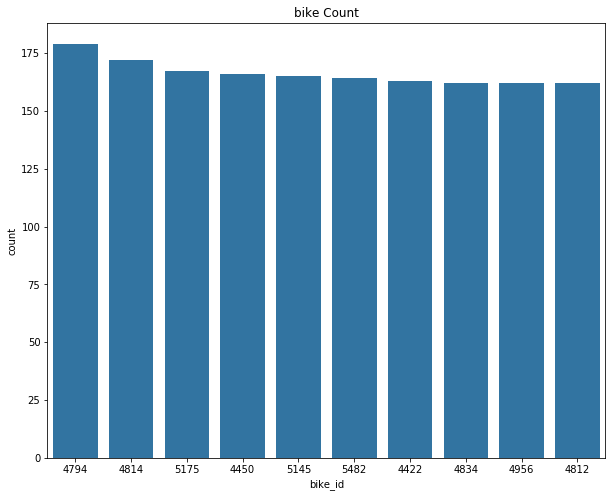

In [36]:
#plotting the graph to determine the most used bike 
base_color=sn.color_palette()[0]
plt.figure(figsize=[10,8])
#to arrange the bike id in descending order
bikes_order=new_ford['bike_id'].value_counts()[:10].index
sn.countplot(data=new_ford,x='bike_id',color=base_color,order=bikes_order)
plt.title('bike Count')

THE MOST USED BIKE IS BIKE _ID WITH ID OF 4794 AND THE TOTAL BIKES USED ARE 4607

WHAT IS THE LEAST BIKE USED

In [37]:
new_ford['bike_id'].value_counts()

4794    179
4814    172
5175    167
4450    166
5145    165
5482    164
4422    163
4834    162
4956    162
4812    162
4773    161
5048    160
5274    159
5325    157
5014    157
4653    156
5351    156
4767    156
5034    154
4742    154
4923    154
5218    154
4728    153
4877    153
5343    153
5286    152
4741    151
4611    151
5392    151
4927    151
       ... 
509       1
1906      1
3234      1
1745      1
362       1
3409      1
6061      1
1397      1
2306      1
6173      1
334       1
3103      1
70        1
5687      1
5998      1
5994      1
2631      1
3585      1
772       1
50        1
3803      1
34        1
231       1
2116      1
3674      1
3395      1
302       1
2089      1
598       1
3222      1
Name: bike_id, Length: 4607, dtype: int64

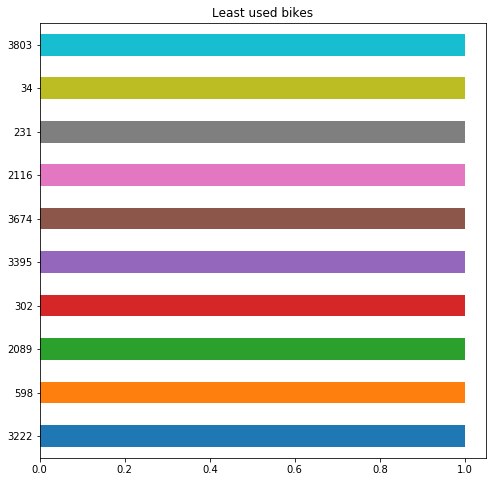

In [38]:
plt.figure(figsize=[8,8])
plt.title('Least used bikes')
new_ford.bike_id.value_counts(ascending=True).head(10).plot.barh();

From the chart,it's obvious that a lot of bikes were lessly used unlike the bikes which were mostly used

WHICH USER USED BIKE MORE

We have to first look at how many users used the bike before knowing which used it more

In [39]:
new_ford.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

we have only two users in this dataset i.e customer and subscriber

now i want to look at the total count of each users that used the bike using bar chart

the percentage also will be looked at using pie chart

Text(0.5,1,'total bike count')

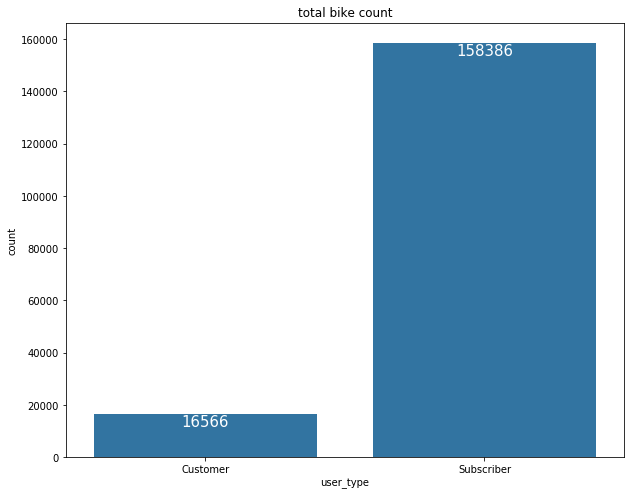

In [40]:
plt.figure(figsize=[10,8])     
base_color = sn.color_palette()[0]
ax = sn.countplot(data=new_ford, x ='user_type', color=base_color)
# add annotations
n_points = new_ford.shape[0]
user_counts = new_ford['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for counts, user in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = user_counts[user.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(counts, count-8, pct_string, va='top', ha='center', color = 'w', fontsize=15)
plt.title('total bike count')

from this ,it shows that there are 16566 customers and 158386 subscriber who uses bike ,meaning the subscribers uses bike more

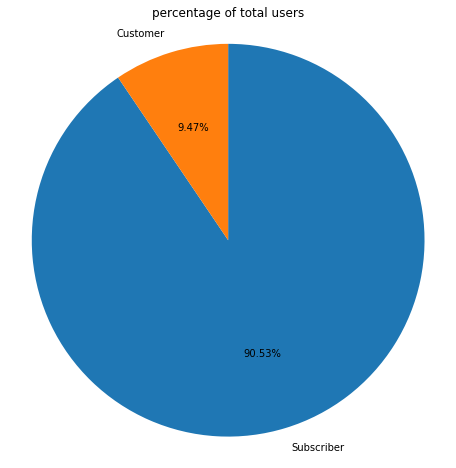

In [41]:
#percentage of users using pie chart 
sorted_percent=new_ford['user_type'].value_counts()
label=sorted_percent.index
plt.figure(figsize=[10,8])
plt.pie(sorted_percent,labels=label,startangle=90,counterclock=False,autopct = '%2.2f%%')
plt.axis('square')
plt.title('percentage of total users')
plt.show()

it shows there are 90.53% of subscribers and 9.47% of customer users .

WHAT IS THE MOST BUSY START STATION

In [42]:
new_ford['start_station_name'].value_counts()[:10]

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

Text(0.5,1,'Descending order of Start station count')

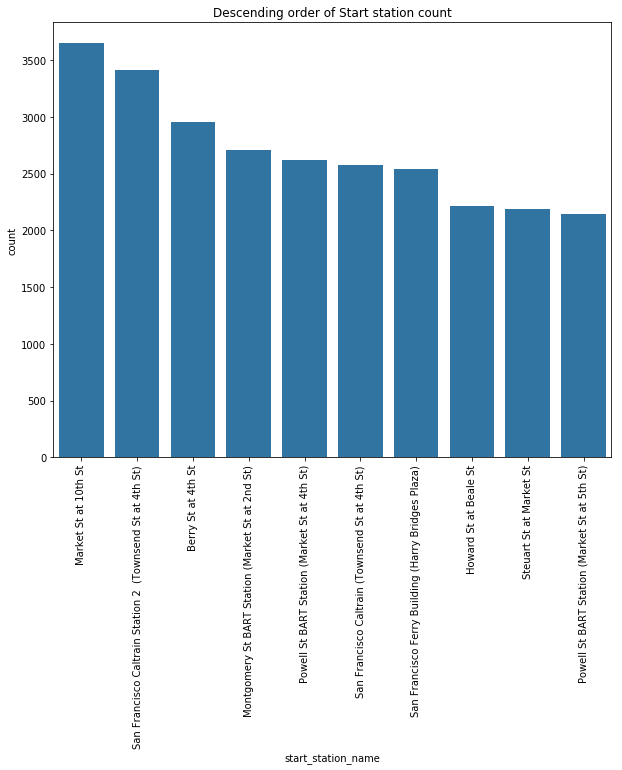

In [43]:
#plotting the graph to determine the most busy start station  
base_color=sn.color_palette()[0]
plt.figure(figsize=[10,8])
plt.xticks(rotation=90)
#to arrange the start station in descending order
Station_order=new_ford['start_station_name'].value_counts()[:10].index
sn.countplot(data=new_ford,x='start_station_name',color=base_color,order=Station_order)
plt.title('Descending order of Start station count')

The most busy start station is the Market St at 10th St

WHAT IS THE LEAST BUSY START STATION

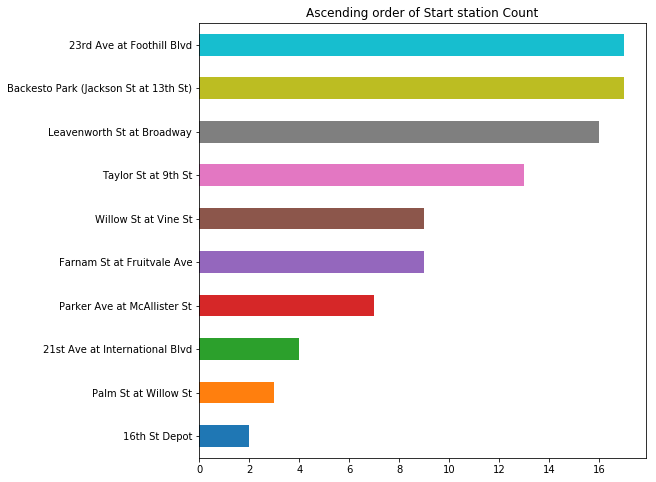

In [44]:
plt.figure(figsize=[8,8])
plt.title('Ascending order of Start station Count')
new_ford.start_station_name.value_counts(ascending=True).head(10).plot.barh();

The least busy start stations is 16th St Depot

WHAT IS THE MOST BUSY END STATION AND LEAST BUSY END STATION

In [45]:
new_ford['end_station_name'].value_counts()[:10]

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

BUSY END STATION

Text(0.5,1,'Descending order of End station count')

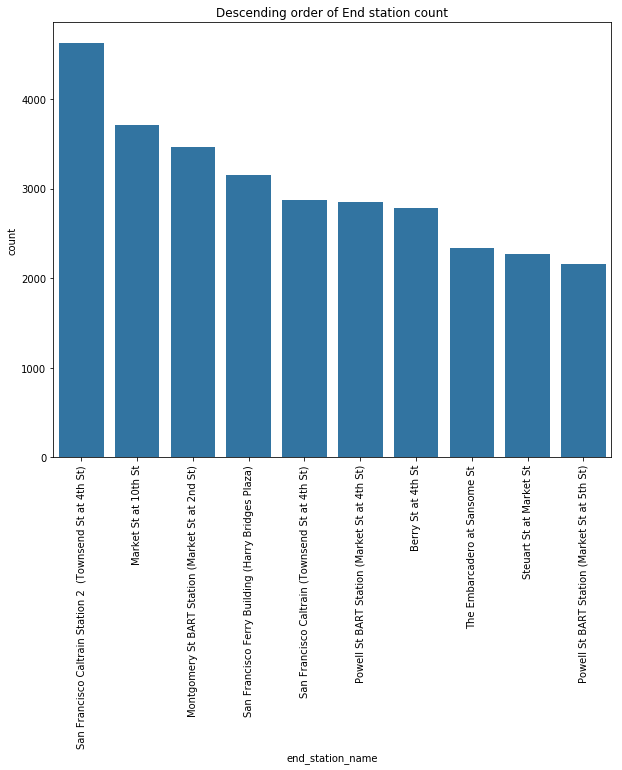

In [46]:
#plotting the graph to determine the most busy start station  
base_color=sn.color_palette()[0]
plt.figure(figsize=[10,8])
plt.xticks(rotation=90)
#to arrange the start station in descending order
Station_order=new_ford['end_station_name'].value_counts()[:10].index
sn.countplot(data=new_ford,x='end_station_name',color=base_color,order=Station_order)
plt.title('Descending order of End station count')

San Francisco is the most busy end station

LEAST BUSY END STATION

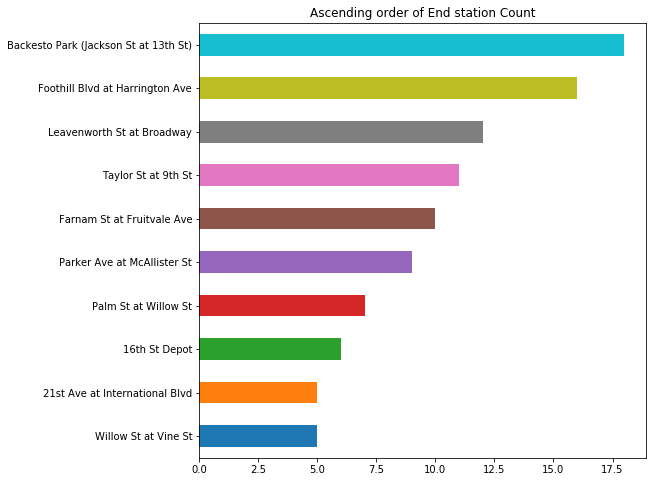

In [47]:
plt.figure(figsize=[8,8])
plt.title('Ascending order of End station Count')
new_ford.end_station_name.value_counts(ascending=True).head(10).plot.barh();

From this,it shows the least end station are 21st Ave & Willow St

its safe to say that the most important stations are Market St at 10th St station & San Francisco as they have the biggest

count in the start and the end while the stations that arent of relevance are the 16th depot and the 21st Ave & Willow St as

they have the lowest count at the start station and end station respectively.

WHICH GENDER USES BIKE MORE

In [48]:
new_ford['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

this shows that males are more than females

i would be using a donut pie to explore this information

Text(0.5,1,'gender percentage')

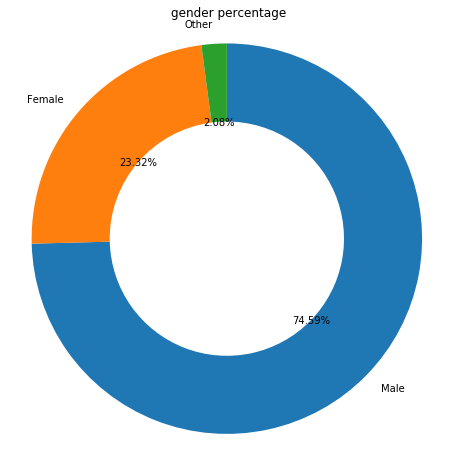

In [49]:
gender_count=new_ford['member_gender'].value_counts()
label=gender_count.index
plt.figure(figsize=[10,8])
plt.pie(gender_count,labels=label,startangle=90,counterclock=False,wedgeprops={'width':0.4},autopct = '%2.2f%%')
plt.axis('square')
plt.title('gender percentage')

this shows that most of the users are males with 74.59%

AGE DISTRIBUTION

In [50]:
#to get the min and max age to prepare bin size
new_ford['member_age'].describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: member_age, dtype: float64

it is obvious that max is 144 and the minimum age is above 20


Text(0.5,1,'Age distribution')

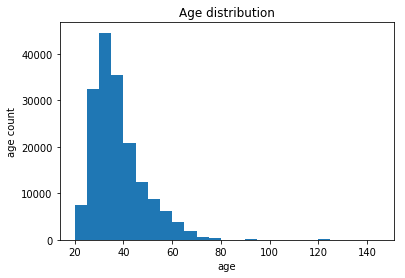

In [51]:
bins=np.arange(20,145+5,5)
plt.hist(data=new_ford,x='member_age',bins=bins)
plt.xlabel('age')
plt.ylabel('age count')
plt.title('Age distribution')

All users are above 20 and the mean age is 37

WEEKDAY WITH HIGHEST BIKE RIDE COUNT

Text(0.5,1,'bike ride count during week days')

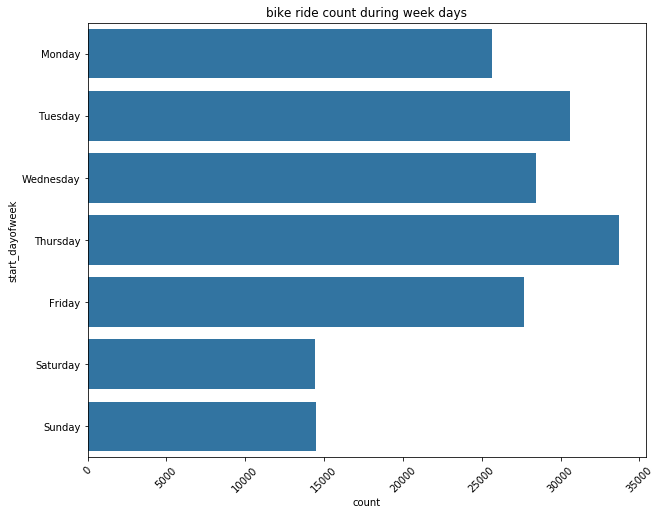

In [52]:
plt.figure(figsize=[10,8])
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(rotation=45)
sn.countplot(data=new_ford, y='start_dayofweek', color=base_color, order =days)
plt.title("bike ride count during week days")

Bike ride is higher in Thursdays than any other day of the week while weekends are extremely low compared to others

MONTH WITH HIGHEST BIKE RIDE COUNT

Text(0.5,1,'bike ride count during months ')

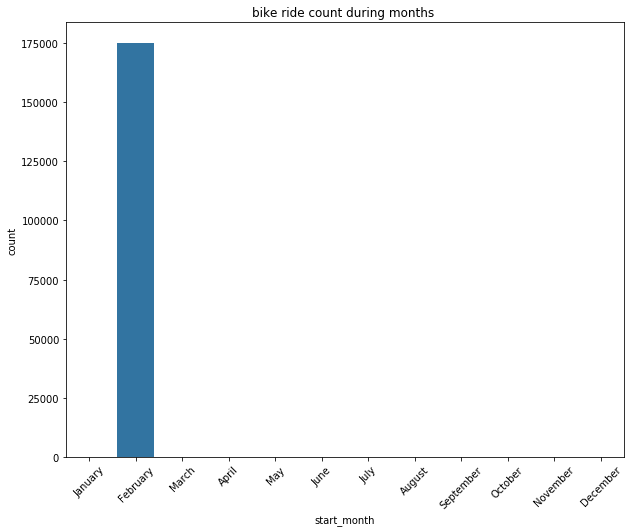

In [53]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=45)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']
sn.countplot(data=new_ford, x='start_month', color=base_color, order = months)
plt.title("bike ride count during months ")

this shows that all trip was made in February alone

HOURS WITH HIGHEST BIKE RIDE

In [54]:
#to get the min and max HOUR to prepare bin size
new_ford['start_hourofday'].describe()

count    174952.000000
mean         13.456165
std           4.734282
min           0.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: start_hourofday, dtype: float64

Text(0.5,1,'hours with highest bike ride')

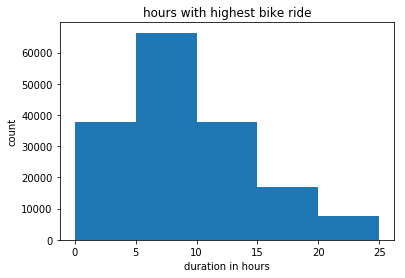

In [55]:
bins = np.arange(0,23+5, 5)
plt.hist(data = new_ford, x = 'duration_minute', bins = bins)
plt.xlabel('duration in hours')
plt.ylabel('count')
plt.title('hours with highest bike ride')

The most usage during the morning hours of 8-9am

MINUTES WITH HIGHEST BIKE RIDE

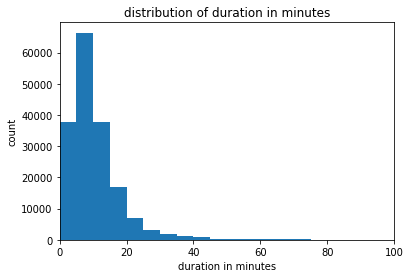

In [56]:
bins = np.arange(0,new_ford['duration_minute'].max()+5, 5)
plt.hist(data = new_ford, x = 'duration_minute', bins = bins)
plt.xlim(0, 100)
plt.xlabel('duration in minutes')
plt.ylabel('count')
plt.title('distribution of duration in minutes');


most of trips are less than 40 min. and there's many outliers in this distribution

would use the log scale to see if there's a long scale as it appears in this chart

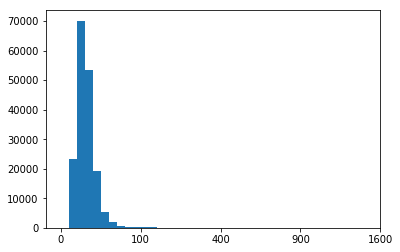

In [57]:
#to check if there's a large scale
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(new_ford['duration_minute'].max())+1, 1)

# Plot the scaled data
plt.hist(new_ford['duration_minute'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(new_ford['duration_minute'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));


it shows there's no long scale and they are just outliers in the variable

OBSERVATIONS FROM THE UNIVARIATE EXPLORATION DATA ANALYSIS

The most used bike is bike id with 4794 and the total bike used is 4607

It shows subscribers uses bike more than customers

the most important stations are Market St at 10th St station & San Francisco while the stations that arent of relevance are the

16th depot and the 21st Ave & Willow St as

Most of the users are males with 74.59%

All users are above 20 and the mean age is 37

Bike ride is higher in Thursdays

All trip was made in February alone

The most usage during the morning hours of 8-9am

Most of trips are less than 40 min. and there's many outliers in this distribution

NOTE

There was an unusual distribution in 'duration_minute' column ,I performed a log scale transformation to see if there was a 

large distribution only to realize that unusual distribution was due to the outliers present 

## Bivariate Exploration



CORRELATION BETWEEN GENDER AND USER

Would be using aclustered bar chart as the variables in comparison are both qualitative variables

Text(0.5,1,'user count among gender')

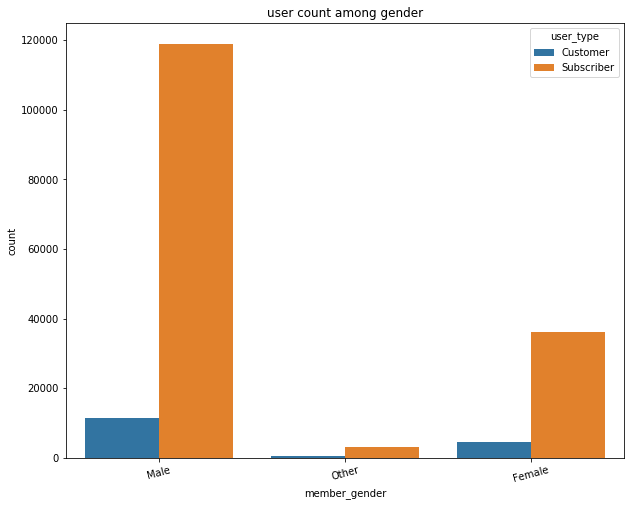

In [58]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=15)
sn.countplot(data=new_ford,x='member_gender',hue ='user_type')
plt.title('user count among gender')

this shows that male subscribers uses bike more when compared to female subscriber

CORRELATION BETWEEN AGE AND DURATION IN MINUTES

Text(0.5,1,'correlation matrix')

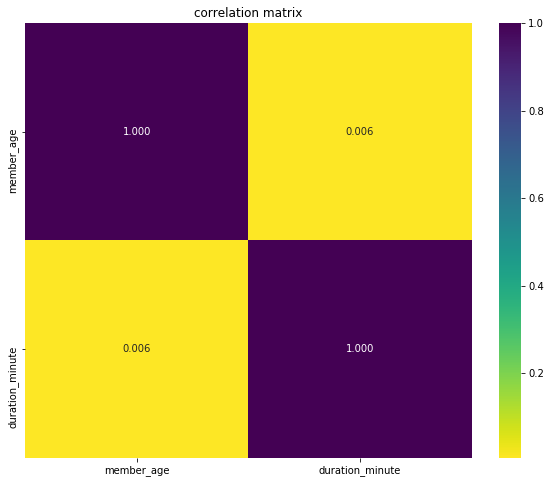

In [59]:
num=['member_age','duration_minute']
plt.figure(figsize=[10,8])
sn.heatmap(new_ford[num].corr(),annot=True,fmt='.3f',cmap='viridis_r')
plt.title('correlation matrix')

this shows a correlation ,will then use a scattered plot to see which duration a person can cover with an average age 

Text(0.5,1,'Age VS Duration')

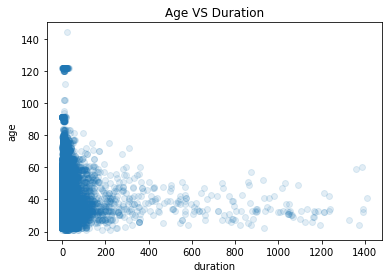

In [60]:
plt.scatter(data = new_ford, y = 'member_age', x = 'duration_minute', alpha = 1/8)
plt.ylabel('age')
plt.xlabel('duration')
plt.title("Age VS Duration")

here is an outlier here,so would remove this by setting minute<= 200 alone

In [61]:
df1 = new_ford[new_ford["duration_minute"] <= 200]

Text(0.5,1,'Age VS Duration')

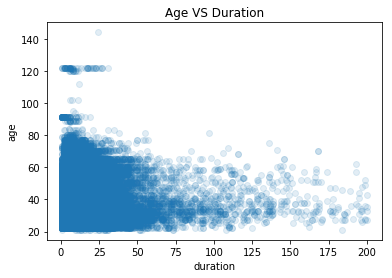

In [62]:
plt.scatter(data = df1, y = 'member_age', x = 'duration_minute', alpha = 1/8)
plt.ylabel('age')
plt.xlabel('duration')
plt.title("Age VS Duration")

its obvious that most people within the mean age of over 37.2 have a longer trip duration than people with older age

CORRELATION BETWEEN AGE AND GENDER

Would be using a boxplot to explore this research question

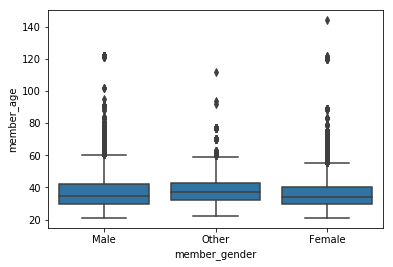

In [63]:
base_color=sn.color_palette()[0]
sn.boxplot(data=new_ford, x='member_gender', y='member_age', color=base_color)

females has the lowest median when compared to males and other

HIGHEST TRIP DURATION OF THE WEEK

Would be using a bar chart for this

Text(0.5,1,'Weekly Trip Duration')

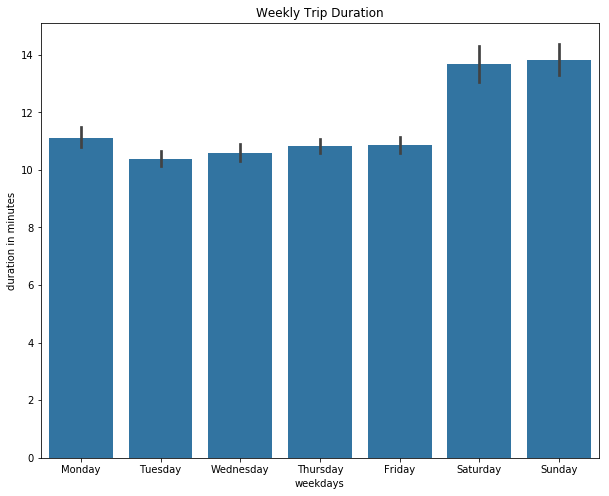

In [64]:
base_color=sn.color_palette()[0]
plt.figure(figsize=[10,8])
ty= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sn.barplot(data=new_ford,x='start_dayofweek',y ='duration_minute',color=base_color,order=ty)
plt.xlabel('weekdays')
plt.ylabel('duration in minutes')
plt.title('Weekly Trip Duration')

this shows that trip duration is longer during weekends most especially sundays which might be due to parties ,events ,church

services

WHICH USERS HAS A LONGER DURATION

In [65]:
customer = new_ford['user_type']=='Customer'
subscriber = new_ford['user_type']=='Subscriber'

In [66]:
#Average trip duration for  customer
new_ford[customer].duration_minute.mean()


21.350476880357359

In [67]:
# Average trip duration for Subscriber
new_ford[subscriber].duration_minute.mean()

10.184132435947621

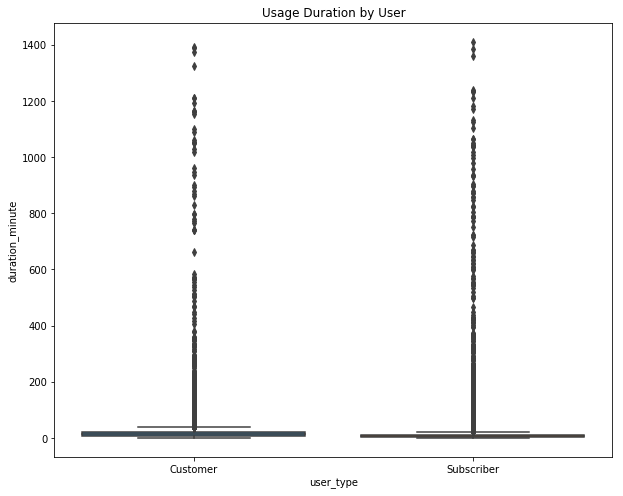

In [68]:
plt.figure(figsize=[10,8])
plt.title('Usage Duration by User')
sn.boxplot(data=new_ford, x='user_type', y='duration_minute')

from the chart above it shows that the customers have a longer trip durations than that of the subsribers ,the mean of the

customers is greater than that of the subscriber

HOURLY DURATION BETWEEN USERS

Would be using a clustered bar chart for this

Text(0.5,1,'hourly duration between users')

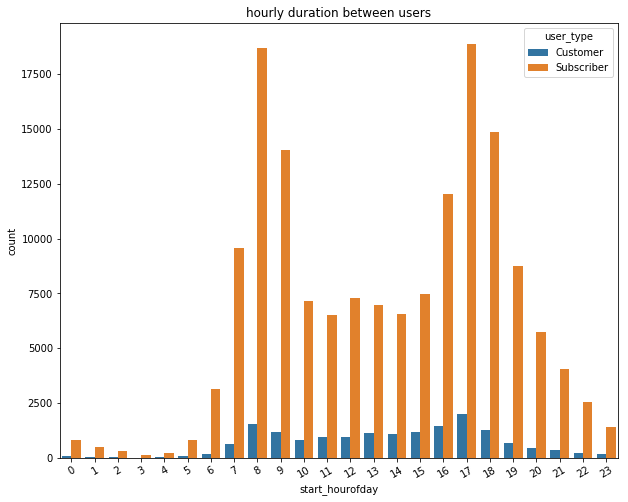

In [69]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=30)
sn.countplot(data=new_ford, x='start_hourofday', hue = 'user_type')
plt.title('hourly duration between users')

17 ,18 representing 5pm ,6pm respectively

this shows that both users(customer and subscriber) has their highest duration during the early hours of 8-9am and late hours

between 5 -6 pm in the evening.

WHICH GENDER HAS A LONGER HOUR DURATION

Text(0.5,1,'hourly duration among gender')

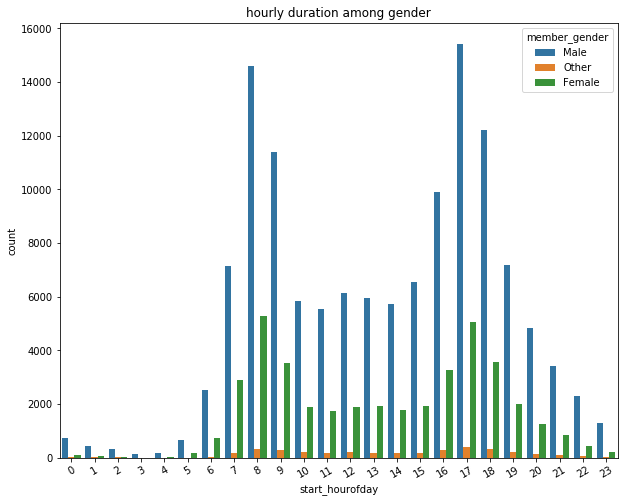

In [70]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=30)
sn.countplot(data=new_ford, x='start_hourofday', hue = 'member_gender')
plt.title('hourly duration among gender')

17 ,18 representing 5pm ,6pm respectively

this shows that both female and male have their highest duration during the early hours of 8-9am and late hours

between 5 -6 pm in the evening while that of other(either female or a male) has it highest at evening during 5pm.

### Talk about some of the relationships you observed in this part of the investigation. 
Male subscribers uses bike more when compared to female subscriber

Most people within the mean age of over 37.2 have a longer trip duration than people with older age.

Females has the lowest median when compared to males.

Trip duration is longer during weekends most especially sundays which might be due to partis ,events ,church

services.

Customers have a longer trip durations than that of the subsribers ,the mean of the

customers is greater than that of the subscriber.

Both users(customer and subscriber) has their highest duration during the early hours of 8-9am and late hours

between 5 -6 pm in the evening.

Both female and male have their highest duration during the early hours of 8-9am and late hours

between 5 -6 pm in the evening while that of other(either female or a male) has it highest at evening during 5pm.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I find it amazing and surprising that most of the trip durations don't occur at night as seen in the chart for both users.

## Multivariate Exploration



CORRELATION BETWEEN USER AGE AND GENDER

Text(0.5,1,'age distribution of gender by user')

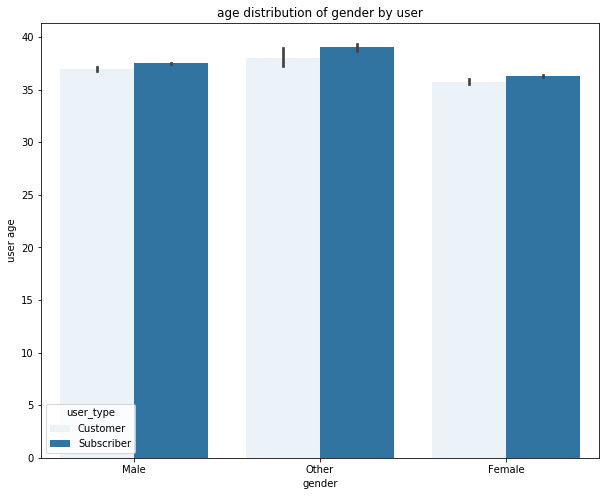

In [71]:
base_color=sn.color_palette()[0]
plt.figure(figsize=[10,8])
sn.barplot(data=new_ford,x='member_gender',y ='member_age',hue='user_type',color=base_color)
plt.xlabel('gender')
plt.ylabel('user age')
plt.title('age distribution of gender by user')

This shows that male subscribers and customers are above 35 while female customers and subscribers are within age range 35

and above 35 respectively

alternative plot using facetgrid plot in seaborn to verify

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


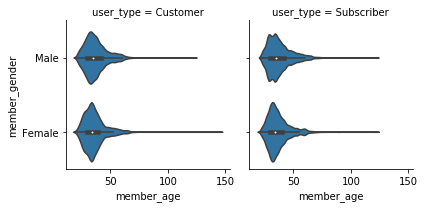

In [72]:
g = sn.FacetGrid(data = new_ford[new_ford['member_gender'] != "Other"] , col = 'user_type', col_wrap=2)
g.map(sn.violinplot, 'member_age', 'member_gender')

CORRELATION BETWEEN USER HOUR DURATION AND DURATION MINUTES

Text(0.5,1,'Trip distribution overday hours and by customer type')

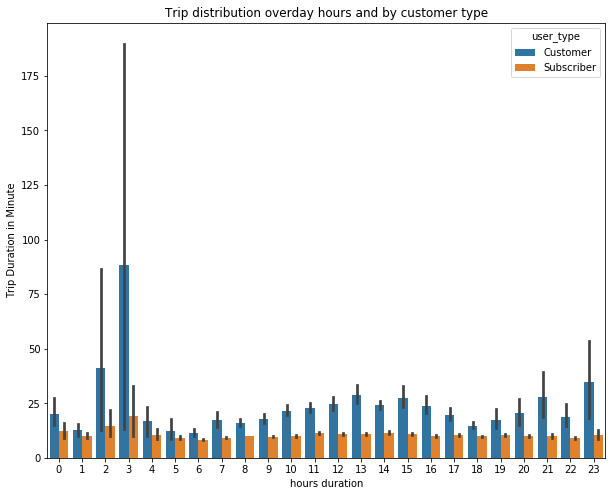

In [73]:
plt.figure(figsize = [10,8])
sn.barplot(data = new_ford, x = "start_hourofday", y = "duration_minute", hue='user_type')
plt.xlabel('hours duration');
plt.ylabel('Trip Duration in Minute')
plt.title("Trip distribution overday hours and by customer type")

customers have longer trip durations at 3am

generally customers have longer hourly trip duration than subscriber

CORRELATION BETWEEN USER WEEKLY TRIP DURATION

Text(0.5,1,'user weekly Trip Duration ')

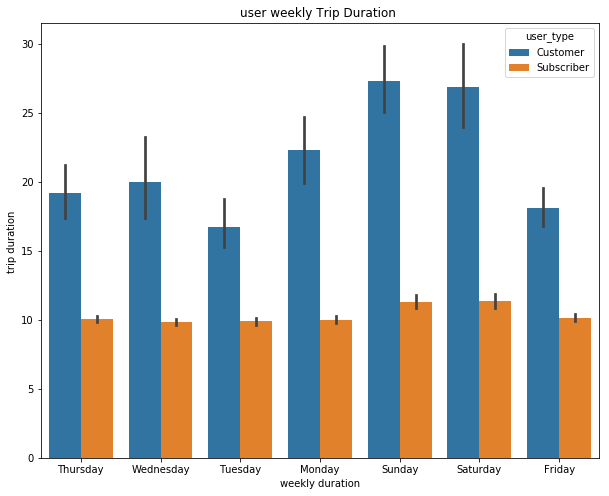

In [74]:
plt.figure(figsize = [10,8])
sn.barplot(data = new_ford, x = "start_dayofweek", y = "duration_minute", hue='user_type')
plt.xlabel('weekly duration');
plt.ylabel('trip duration ')
plt.title("user weekly Trip Duration ")

Generally customers have longer weekly trip duration than subscriber,customers have longer trip durations on Sundays

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Male subscribers and customers are above 35 while female customers and subscribers are within age range 35

and above 35 respectively.

Generally customers have longer hourly trip duration than subscriber,customers have longer trip durations at 3am.

Generally customers have longer weekly trip duration than subscriber,customers have longer trip durations on Sundays.


### Were there any interesting or surprising interactions between features?

The only thing I found intriguing was how there was a night trip among customer user in the multivariate exploratory analysis

SAVING CLEANED FILE FOR EXPLANATORY ANALYSIS 

In [75]:
new_ford.to_csv('clean_fordgo_bike.csv',index=False)

## Conclusions

steps taken during the data exploration.

I imported libraries,loaded my dataset, programmatically assessed my dataset ,cleaned errors seen in the assessing section by 

dropping missing numbers,correcting wrong data types ,removing unnecessary columns,performed tidiness issue and made a copy of

the original dataset 

I also saved my clean datasset to use in my explanatory analysis 

OBSERVATIONS SUMMARY 

It shows subscribers uses bike more than customers

the most important stations are Market St at 10th St station & San Francisco while the stations that arent of relevance are the

16th depot and the 21st Ave & Willow St as

Most of the users are males with 74.59%

All users are above 20 and the mean age is 37

Bike ride is higher in Thursdays

All trip was made in February alone

The most usage during the morning hours of 8-9am

Most of trips are less than 40 min. and there's many outliers in this distribution

Male subscribers uses bike more when compared to female subscriber

Most people within the mean age of over 37.2 have a longer trip duration than people with older age.

Females has the lowest median when compared to males.

Trip duration is longer during weekends most especially sundays which might be due to partis ,events ,church

services.

Male subscribers and customers are above 35 while female customers and subscribers are within age range 35

and above 35 respectively.

Generally customers have longer hourly trip duration than subscriber,customers have longer trip durations at 3am.

Generally customers have longer weekly trip duration than subscriber,customers have longer trip durations on Sundays.

LIMITATIONS 

there were missing numbers which I corrected in the cleaning section

In [77]:
from subprocess import call
call(['python','-m', 'nbconvert', 'Part_I_exploration_template'])

0